# 09 Differentiation
See *Computational Physics* (Landau, Páez, Bordeianu), Chapter 5.1 – 5.6.

These slides include material from  *Computational Physics. eTextBook Python 3rd Edition.* Copyright © 2012 Landau, Rubin, Páez. Used under the Creative-Commons Attribution-NonCommerical-ShareAlike 3.0 Unported License.

## Theory 

Taking numerical *derivatives* is based on the elementary definition


$$
\frac{dy(t)}{dt} := \lim_{h\rightarrow 0} \frac{y(t+h) - y(t)}{h}
$$



Problem $h\rightarrow 0$: 
* subtractive cancelations in numerator
* overflow `number / epsilon_m`

### Forward difference
Expand $y(t)$ in Taylor series

$$
y(t+h) = y(t) + h y^{(1)}(t) + \frac{h^2}{2!} y^{(2)}(t) + \frac{h^3}{3!} y^{(3)}(t) + \cdots
$$

(with the derivatives $y^{(n)} \equiv \frac{d^{n}y}{dt^n}$)


$$
\frac{y(t+h) - y(t)}{h} = y^{(1)}(t) + \frac{h}{2!} y^{(2)}(t) + \frac{h^2}{3!} y^{(3)}(t) + \cdots
$$


#### Forward difference algorithm

Neglect $\mathcal{O}(h^2)$ terms:

$$
\frac{dy(t)}{dt} \simeq D_\text{fd} y(t) \equiv \frac{y(t+h) - y(t)}{h}
$$

$$
D_\text{fd} y(t) \equiv \frac{y(t+h) - y(t)}{h}
$$
![Forward difference approximation](./images/CompPhys_forward_difference.png)
<span style="font-size: small; text-align: right">Image from Computational Physics. eTextBook Python 3rd Edition. Copyright © 2012 Landau, Rubin, Páez. Used under the Creative-Commons Attribution-NonCommerical-ShareAlike 3.0 Unported License.</span>

#### Approximation error in the forward difference algorithm
Substitute the Taylor series into $D_\text{fd} y(t)$

$$
D_\text{fd} y(t) = y^{(1)}(t) - \frac{h}{2} y^{(2)}(t) + \cdots
$$
so the error is **first order in $h$**:
$$
y^{(1)}(t) - D_\text{fd} y(t) = \frac{1}{2} h y^{(2)}(t) + \mathcal{O}(h^2)
$$

#### Example for $D_\text{fd}$

Quadratic function
$$
y(t) = a + bt^2 \quad \text{and}\quad y^{(1)}(t) = 2bt
$$
Forward difference approximation
$$
D_\text{fd} y(t) = \frac{y(t+h) - y(t)}{h} = 2bt + bh
$$
is only good for small $h \ll \frac{1}{b}$.

### Central difference
Improve over the (rather bad) error in the *forward difference algorithm* by using the *central difference*.

![Central difference approximation](./images/CompPhys_central_difference.png)

<span style="font-size: small; text-align: right">Image from Computational Physics. eTextBook Python 3rd Edition. Copyright © 2012 Landau, Rubin, Páez. Used under the Creative-Commons Attribution-NonCommerical-ShareAlike 3.0 Unported License.</span>

#### Central difference algorithm
$$
D_\text{cd} y(t) \equiv \frac{y\Big(t + \frac{h}{2}\Big) - y\Big(t - \frac{h}{2}\Big)}{h}
$$

Applied to the parabola $y(t) = a + bt^2$ yields the exact result:
$$
D_\text{cd} y(t)= 2bt
$$

#### Approximation error in $D_\text{cd}$
Insert Taylor expansion...

$$
y^{(1)}(t) - D_\text{cd} y(t) = \frac{1}{24} h^2 y^{(3)}(t) + \mathcal{O}(h^4)
$$

The error is **second order in $h$**.

This is generally *much better* than the forward difference.

"Generally" means "when $y(t)$ is sufficiently smooth", i.e. 
\begin{align}
y^{(3)} \frac{h^2}{24} &\ll y^{(2)} \frac{h}{2} \quad\text{or}\\
12\frac{y^{(2)}}{y^{(3)}} &\gg h.
\end{align}

Other difference algorithms exist with even better error behavior (see homework) but all have problems with data that are not smooth. In this case you might have to smooth the data in advance by *interpolation* or *kernel density estimates* (KDE).

### Error assessment
$$
\epsilon_\text{tot} = \epsilon_\text{app} + \epsilon_\text{ro}
$$

**Round-off error of differentiation**: difference of two similar numbers cannot be better than machine precision, always divided by small number $h$:

$$
\epsilon_\text{ro} \approx \frac{\epsilon_m}{h}
$$

**Forward difference algorithmic error**
$$
\epsilon_\text{app}^\text{fd} = y^{(2)} \frac{h}{2}
$$

What is the *most accurate value of $h$* that we can choose for $D_\text{fd}$?

Cross-over from approximation error to round-off error around

$$
\epsilon_\text{app} = \epsilon_\text{ro}
$$

For the forward difference
$$
y^{(2)} \frac{h_\text{fd}}{2} = \frac{\epsilon_m}{h_\text{fd}}\\
h_\text{fd}^2 = \frac{2\epsilon_m}{y^{(2)}}
$$


For rough estimate, assume $y^{(1)} \approx y^{(2)} \approx y^{(3)} \approx 1$:

In [1]:
import numpy as np
def h_fd(eps_m, y2=1):
    return np.sqrt(2*eps_m/y2)
def eps_fd(eps_m, y2=1.):
    h = h_fd(eps_m, y2=y2)
    return 2*eps_m/h

In [2]:
eps_m = 1e-15
print("h_fd = {0:.2e}".format(h_fd(eps_m, y2=1)))
print("eps_fd = {0:.2e}".format(eps_fd(eps_m, y2=1)))      

h_fd = 4.47e-08
eps_fd = 4.47e-08


For double precision ($\epsilon_m = 10^{-15}$)
$$
h_\text{fd} \approx 4\times 10^{-8}\\
\epsilon_\text{tot}^\text{fd} \approx 2\epsilon_\text{ro} = \frac{2\epsilon_m}{h_\text{fd}} =  h_\text{fd} = 4 \times 10^{-8}
$$

(Note: simplified because $y^{(2)} \approx 1$.)

Do you expect the "best" $h_\text{cd}$ for the *central difference algorithm* to be larger or smaller than $h_\text{fd}$?

$$
h_\text{cd}^3 = \frac{24\epsilon_m}{y^{(3)}}
$$

Generally $h_\text{cd} > h_\text{fd}$ because the better algorithm allows you to use a bigger step size for a smaller error.

## Student Problem: Finite Difference Operators (Solution)
- implement the three finite difference operators as functions
- test implementations
- `git pull` the course resources and work with the notebook **[09_differentiation/09-differentiation-students.ipynb](http://nbviewer.jupyter.org/github/ASU-CompMethodsPhysics-PHY494/PHY494-resources/blob/master/09_differentiation/09-differentiation-students.ipynb)**.

### Implementation in Python

\begin{align}
D_\text{fd} y(t) &\equiv \frac{y(t+h) - y(t)}{h} \\
D_\text{cd} y(t) &\equiv \frac{y\Big(t + \frac{h}{2}\Big) - y\Big(t - \frac{h}{2}\Big)}{h}
\end{align}

and also the *extended difference algorithm*

\begin{align}
D_\text{ed} y(t) &\equiv \frac{4 D_\text{cd}y(t, h/2) - D_\text{cd}y(t, h)}{3} \\
  &= \frac{8\big(y(t+h/4) - y(t-h/4)\big) - \big(y(t+h/2) - y(t-h/2)\big)}{3h}
\end{align}


In [3]:
def D_fd(y, t, h):
    """Forward difference"""
    return (y(t + h) - y(t))/h

def D_cd(y, t, h):
    """Central difference"""
    # implement

def D_ed(y, t, h):
    """Extended difference"""
    # implement

#### Test your implementations
Test function: $y(t) = \cos t$
1. What is the analytical derivative $\frac{d\cos(t)}{dt}$?
1. Calculate the derivative of $y(t) = \cos t$ at $t=0.1, 1, 100$.
1. Print derivative and relative error $E = \frac{D y(t) - y^{(1)}(t)}{y^{(1)}(t)}$ (finite difference value $D y(t)$ compared to the analystical value $y^{(1)}(t)$– use numpy functions for "exact" values) as function of $h$.
1. Reduce $h$ until you reach machine precision, $h \approx \epsilon_m$
1. Plot $\log_{10} |E(h)|$ against $\log_{10} h$.

Try to do the above for all three algorithms

#### Function definitions (Solution)

In [4]:
def D_fd(y, t, h):
    """Forward difference"""
    return (y(t + h) - y(t))/h

def D_cd(y, t, h):
    """Central difference"""
    return (y(t + h/2) - y(t - h/2))/h

def D_ed(y, t, h):
    """Extended difference"""
    return (8*(y(t + h/4) - y(t - h/4)) - (y(t + h/2) - y(t - h/2)))/(3*h)

In [5]:
import numpy as np
# test function: np.cos

# Analytical derivative
def y1(t):
    return -np.sin(t)

t_values = np.array([0.1, 1, 100], dtype=np.float64)

Use numpy functions for everything because then you can operate on all `t_values` at once.

#### Evaluate the finite difference derivatives
Note that we pass *a function* `y` to the forward difference function `D_fd` and we can also pass a whole array of `t_values`!

In [6]:
D_fd(np.cos, t_values, 0.1)

array([-0.14937587, -0.86706184,  0.46244209])

In [7]:
D_fd(np.cos, t_values, 1e-12)

array([-0.09980905, -0.84154905,  0.50359716])

#### Evaluate the exact derivatives
Compute the exact derivatives (again, operate on all $t$ together... start thinking in numpy arrays!)

In [8]:
y1(t_values)

array([-0.09983342, -0.84147098,  0.50636564])

Calculation of the **absolute error**: subtract the two arrays that you got previously:

In [9]:
D_fd(np.cos, t_values, 0.1) - y1(t_values)

array([-0.04954246, -0.02559086, -0.04392355])

#### Calculate the relative error $E$

In [10]:
def error(Dxx, y, y1, t, h):
    """Relative error.
    
    Note: will fail for exact 0.
    """
    y1_val = y1(t)
    # return (Dxx(y, t, h) - y1_val/y1_val
    return Dxx(y, t, h)/y1_val - 1

Note that we pass again a general function for the difference operator so that we can use `error()` with `D_fd()`, `D_cd()` and `D_ep()`.

In [11]:
error(D_fd, np.cos, y1, t_values, 0.1)

array([ 0.49625125,  0.03041205, -0.08674275])

In [12]:
error(D_fd, np.cos, y1, t_values, 1e-12)

array([-2.44073917e-04,  9.27754603e-05, -5.46734793e-03])

#### Plot $|E|$
Plot $\log_{10} |E(h)|$ against $\log_{10} h$.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 

In [14]:
h_values = 10**(np.arange(-15, -1, 0.1))
abs_errors = np.abs(error(D_fd, np.cos, y1, 0.1, h_values))

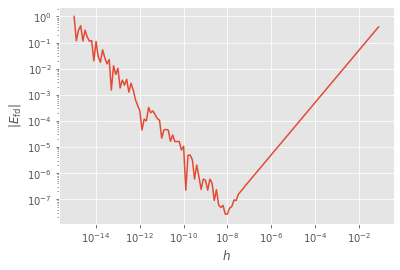

In [15]:
plt.loglog(h_values, abs_errors, label="t=0.1")
plt.xlabel(r"$h$")
plt.ylabel(r"$|E_\mathrm{fd}|$");

##### Forward Difference $D_\text{fd}$
Plot the three different $t$ values together in one plot:

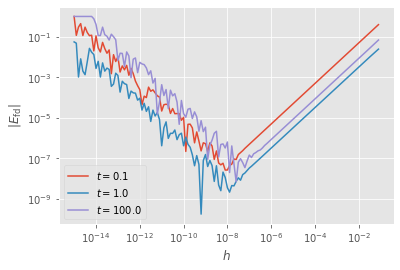

In [16]:
for t in t_values:
    abs_errors = np.abs(error(D_fd, np.cos, y1, t, h_values))
    plt.loglog(h_values, abs_errors, label=r"$t={}$".format(t))
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E_\mathrm{fd}|$");

* error behavior depends on $t$ and on cancellation of errors (e.g. for $t=1$
* algorithmic error decreases for decreasing $h$ until the round of error starts dominating

##### Central Difference $D_\text{cd}$
Plot the three different $t$ values together in one plot:

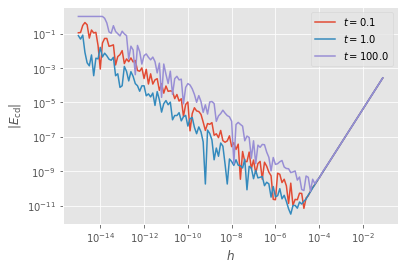

In [17]:
for t in t_values:
    abs_errors = np.abs(error(D_cd, np.cos, y1, t, h_values))
    plt.loglog(h_values, abs_errors, label=r"$t={}$".format(t))
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E_\mathrm{cd}|$");

##### Extended Difference $D_\text{ed}$
Plot the three different $t$ values together in one plot:

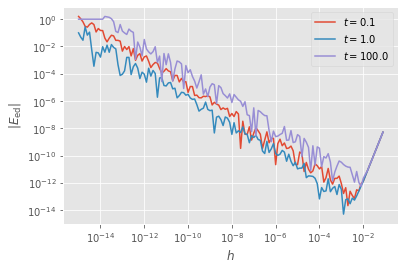

In [18]:
for t in t_values:
    abs_errors = np.abs(error(D_ed, np.cos, y1, t, h_values))
    plt.loglog(h_values, abs_errors, label=r"$t={}$".format(t))
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E_\mathrm{ed}|$");